<a href="https://colab.research.google.com/github/dewayneh57/ACS5513/blob/main/ACS_5513_Petabyte_Pirates_Project_Deliverable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# options
pd.set_option("display.max_columns", None)

file_path_url = 'https://raw.githubusercontent.com/dewayneh57/ACS5513/main/ACS-5113_Petabyte_Pirates_Deliverable_1.csv'

# Load the latest version
df = pd.read_csv(file_path_url)

print(df.shape)
df.head(20)

(2789, 91)


,MS SubClass,Overall Qual,Year Built,Year Remod/Add,BsmtFin Type 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,SalePrice,SaleDate,House Age,Remodel Age,Age Bucket,Total SF,Total SF Plus Garage,Total Baths,Price per SF,Qual x SF,Season Sold,Exter Qual_Ord,Bsmt Qual_Ord,Heating QC_Ord,Kitchen Qual_Ord,Fireplace Qu_Ord,Functional_Ord,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__NAmes,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__Other,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__Timber,House Style__2Story,House Style__SFoyer,Bldg Type__2fmCon,Bldg Type__Duplex,Bldg Type__Twnhs,Bldg Type__TwnhsE,Sale Condition__Other,Sale Condition__Partial,Sale Type__New,Sale Type__Other,Sale Type__WD,Garage Type__BuiltIn,Garage Type__Detchd,Garage Type__Other,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Exterior 1st__CemntBd,Exterior 1st__HdBoard,Exterior 1st__MetalSd,Exterior 1st__Stucco,Exterior 1st__VinylSd,Exterior 1st__Wd Sdng,Exterior 1st__WdShing,Exterior 2nd__CmentBd,Exterior 2nd__HdBoard,Exterior 2nd__MetalSd,Exterior 2nd__Stucco,Exterior 2nd__VinylSd,Exterior 2nd__Wd Sdng,Exterior 2nd__Wd Shng,Roof Style__Hip,MS Zoning__Other,MS Zoning__RL,MS Zoning__RM,Lot Shape__IR2,Lot Shape__Reg,Lot Config__CulDSac,Lot Config__Inside,Condition 1__Feedr,Condition 1__Norm,Condition 1__PosN
0,20,6,1960,1960,BLQ,1080.0,1656,1656,1,1960.0,Fin,2.0,528.0,215000,2010-05-01,50,50,30-60,2736.0,3264.0,1.0,78.581871,16416.0,Spring,3,3.0,2,3,4.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False
1,20,5,1961,1961,Rec,882.0,896,896,1,1961.0,Unf,1.0,730.0,105000,2010-06-01,49,49,30-60,1778.0,2508.0,1.0,59.055118,8890.0,Summer,3,3.0,3,3,0.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,True,False,False
2,20,6,1958,1958,ALQ,1329.0,1329,1329,1,1958.0,Unf,1.0,312.0,172000,2010-06-01,52,52,30-60,2658.0,2970.0,1.5,64.710309,15948.0,Summer,3,3.0,3,4,0.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False
3,20,7,1968,1968,ALQ,2110.0,2110,2110,2,1968.0,Fin,2.0,522.0,244000,2010-04-01,42,42,30-60,4220.0,4742.0,2.5,57.819905,29540.0,Spring,4,3.0,5,5,3.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False
4,60,5,1997,1998,GLQ,928.0,928,1629,2,1997.0,Fin,2.0,482.0,189900,2010-03-01,13,12,11-30,2557.0,3039.0,2.5,74.266719,12785.0,Spring,3,4.0,4,3,3.0,8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,

In [3]:
# encode garage finish with an ordinal map, missed from deliverable 1, and check
# pearson corelation coefficient.
# Fin    Finished (3)
# RFn    Rough Finished (2)
# Unf    Unfinished (1)
# NA    No Garage (0)

  ordinal_map = {
      'Fin': 3,
      'RFn': 2,
      'Unf': 1,
      'NA': 0
  }

df['Garage Finish_Ord'] = df['Garage Finish'].map(ordinal_map).fillna(0)

correlation_garage_finish_ord = df['Garage Finish_Ord'].corr(df['SalePrice'])

print("Correlation with 'Garage Finish: ", correlation_garage_finish_ord)

# 0.56 pearson coefficient warrants evaluating multiplicatives with other
# features, such as:
#    - Garage Finish_Ord x Garage Area
#    - Garage Finish_Ord x Garage Cars
#    - Garage Finish_Ord x Garage Area x Garage Cars
# Then, with the one-hot encoded features:
#    - Garage Type__BuiltIn
#    - Garage Type__Detchd
#    - Garage Type__Other

df['Garage Finish x Garage Area'] = df['Garage Finish_Ord'] * df['Garage Area']
df['Garage Finish x Garage Cars'] = df['Garage Finish_Ord'] * df['Garage Cars']
df['Garage Finish x Garage Area x Garage Cars'] = df['Garage Finish_Ord'] * df['Garage Area'] * df['Garage Cars']

correlation_garage_finish_ord_x_garage_area = df['Garage Finish x Garage Area'].corr(df['SalePrice'])
correlation_garage_finish_ord_x_garage_cars = df['Garage Finish x Garage Cars'].corr(df['SalePrice'])
correlation_garage_finish_ord_x_garage_area_x_garage_cars = df['Garage Finish x Garage Area x Garage Cars'].corr(df['SalePrice'])

print("Correlation with 'Garage Finish x Garage Area: ", correlation_garage_finish_ord_x_garage_area)
print("Correlation with 'Garage Finish x Garage Cars: ", correlation_garage_finish_ord_x_garage_cars)
print("Correlation with 'Garage Finish x Garage Area x Garage Cars: ", correlation_garage_finish_ord_x_garage_area_x_garage_cars)

df['Garage Cars x Garage Area'] = df['Garage Cars'] * df['Garage Area']

correlation_garage_cars_x_garage_area = df['Garage Cars x Garage Area'].corr(df['SalePrice'])

print("Correlation with 'Garage Cars x Garage Area: ", correlation_garage_cars_x_garage_area)

Correlation with 'Garage Finish:  0.5620386730761091
Correlation with 'Garage Finish x Garage Area:  0.7084213901110302
Correlation with 'Garage Finish x Garage Cars:  0.6962947413059278
Correlation with 'Garage Finish x Garage Area x Garage Cars:  0.7034148202078925
Correlation with 'Garage Cars x Garage Area:  0.6259395066708922


In [4]:
# Also check Overall Qual x Total SF Plus Garage Correlation with SalePrice

df['Qual x SF Plus Garage'] = df['Overall Qual'] * df['Total SF Plus Garage']

correlation_qual_x_sf = df['Qual x SF Plus Garage'].corr(df['SalePrice'])

print("Correlation with 'Overall Qual x Total SF Plus Garage: ", correlation_qual_x_sf)


Correlation with 'Overall Qual x Total SF Plus Garage:  0.9021644325691964


In [5]:
#  Clean up remaining categorical / date columns
#  and rebuild numeric model matrix
#  Columns we still need to handle:
#     BsmtFin Type 1  (nominal)
#     Garage Finish   (drop – already ordinal-encoded)
#     SaleDate        (YYYY-MM-DD)
#     Age Bucket      (ordinal buckets)
#     Season Sold     (nominal)
# ============================================================

# Drop Garage Finish (string) – we have Garage Finish_Ord
if 'Garage Finish' in df.columns:
    df.drop(columns=['Garage Finish'], inplace=True)

# Parse SaleDate and create Year / Month / Quarter numeric cols
df['SaleDate'] = pd.to_datetime(df['SaleDate'], errors='coerce')

df['SaleYear']    = df['SaleDate'].dt.year
df['SaleMonth']   = df['SaleDate'].dt.month
df['SaleQuarter'] = df['SaleDate'].dt.quarter

# Drop SaleDate
df.drop(columns=['SaleDate'], inplace=True)

# Map Age Bucket to ordered integers
age_map = {'≤10': 4, '11-30': 3, '30-60': 2, '60+': 1}
df['Age Bucket_Ord'] = df['Age Bucket'].map(age_map)
df.drop(columns=['Age Bucket'], inplace=True)

# One-hot encode BsmtFin Type 1 and Season Sold
ohe_cols = ['BsmtFin Type 1', 'Season Sold']
df = pd.get_dummies(df, columns=ohe_cols, drop_first=False, prefix_sep='__')

# Convert any lingering booleans to 0/1 ints
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# At this point every column should be numeric
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Columns: 106 entries, MS SubClass to Season Sold__Winter
dtypes: float64(17), int32(3), int64(86)
memory usage: 2.2 MB
None


In [6]:
# check all correlation with numeric features again
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()
corr_matrix['SalePrice'].sort_values(ascending=False).head(30)

,SalePrice
SalePrice,1.000000
Qual x SF Plus Garage,0.902164
Qual x SF,0.891293
Total SF Plus Garage,0.819095
Overall Qual,0.789428
Total SF,0.783892
Garage Finish x Garage Area,0.708421
Garage Finish x Garage Area x Garage Cars,0.703415
Garage Finish x Garage Cars,0.696295
Gr Liv Area,0.675132


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 3, 5]
}

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

# Best params and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated RMSE: {-grid_search.best_score_:,.0f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 400}
Best Cross-Validated RMSE: 20,821


In [8]:
#  RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Modelling dataframe
df_model = df.copy()

# Drop Price per Square Feet from df_model
df_model.drop(columns=['Price per SF'], inplace=True)

X = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Run the RandomForestRegressor model
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=20,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
r2   = r2_score(y_test, rf.predict(X_test))

print(f"Test RMSE : {rmse:,.0f}")
print(f"Test R²   : {r2:.3f}")

# Feature importances
imp = (
    pd.Series(rf.feature_importances_, index=X.columns)
      .sort_values(ascending=False)
)
print("\nTop-30 feature importances:")
display(imp.head(30))

# Export all feature importances to csv
imp.to_csv('feature_importances.csv')

Test RMSE : 20,673
Test R²   : 0.888

Top-30 feature importances:


,0
Qual x SF Plus Garage,0.803169
Qual x SF,0.018767
Remodel Age,0.011998
Gr Liv Area,0.010386
Total SF Plus Garage,0.009764
Year Remod/Add,0.009652
Total Bsmt SF,0.008725
House Age,0.007415
Garage Yr Blt,0.007130
Fireplace Qu_Ord,0.006122


In [20]:
# Finalize the feature set and run RandomForestRegressor once more

df_model = df[[
    'Qual x SF Plus Garage',
    'Qual x SF',
    'Remodel Age',
    'Gr Liv Area',
    'Total SF Plus Garage',
    'Year Remod/Add',
    'Total Bsmt SF',
    'House Age',
    'Garage Yr Blt',
    'Fireplace Qu_Ord',
    'Total SF',
    'Year Built',
    '1st Flr SF',
    'Garage Finish x Garage Area',
    'Kitchen Qual_Ord',
    'Garage Finish x Garage Area x Garage Cars',
    'Bsmt Qual_Ord',
    'Garage Cars x Garage Area',
    'Garage Area',
    'Garage Finish x Garage Cars',
    'Heating QC_Ord',
    'Total Baths',
    'Overall Qual',
    'Garage Finish_Ord',
    'Exter Qual_Ord',
    'House Style__2Story',
    'Garage Cars',
    'SalePrice',
    'MS SubClass'
]].copy().dropna()

X = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Run the RandomForestRegressor model
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=20,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
r2   = r2_score(y_test, rf.predict(X_test))

print(f"Test RMSE : {rmse:,.0f}")
print(f"Test R²   : {r2:.3f}")

# Feature importances
imp = (
    pd.Series(rf.feature_importances_, index=X.columns)
      .sort_values(ascending=False)
)
print("\nTop-30 feature importances:")
display(imp.head(30))


Test RMSE : 20,758
Test R²   : 0.864

Top-30 feature importances:


,0
Qual x SF Plus Garage,0.770950
Qual x SF,0.051268
Remodel Age,0.017481
Gr Liv Area,0.015317
Total Bsmt SF,0.013313
Year Remod/Add,0.012539
Total SF Plus Garage,0.010984
1st Flr SF,0.010259
Garage Finish x Garage Area,0.009586
Fireplace Qu_Ord,0.008848


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error


# Define 5-fold CV and custom RMSE scorer
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Run CV and report results
rmse_scores = -cross_val_score(rf, X, y, cv=kf, scoring=rmse_scorer)
r2_scores   =  cross_val_score(rf, X, y, cv=kf, scoring='r2')

print(f"Cross-validated RMSE : {rmse_scores.mean():,.0f}  ± {rmse_scores.std():,.0f}")
print(f"Cross-validated R²   : {r2_scores.mean():.3f}  ± {r2_scores.std():.3f}")

# Show per-fold scores
cv_df = pd.DataFrame({
    'Fold': range(1, 6),
    'RMSE': rmse_scores.round(0),
    'R²'  : r2_scores.round(3)
})
display(cv_df)

Cross-validated RMSE : 21,595  ± 795
Cross-validated R²   : 0.860  ± 0.013


,Fold,RMSE,R²
0,1,20862.0,0.863
1,2,21398.0,0.849
2,3,21675.0,0.879
3,4,20969.0,0.866
4,5,23073.0,0.844


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline that first imputes and then fits the Linear Regression model
lr_pipeline = Pipeline([
    ('imputer', imputer),
    ('linear_regression', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Reg RMSE: {rmse:,.0f}, R²: {r2:.3f}")

Linear Reg RMSE: 21,076, R²: 0.860


In [16]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline that first imputes and then fits the Ridge model
ridge_pipeline = Pipeline([
    ('imputer', imputer),
    ('ridge', Ridge(alpha=10))
])

ridge_pipeline.fit(X_train, y_train)

y_pred = ridge_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Ridge RMSE: {rmse:,.0f}, R²: {r2:.3f}")

Ridge RMSE: 21,099, R²: 0.860


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306058426168.9907, tolerance: 589014438.1817861
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328384627.6235352, tolerance: 589014438.1817861
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/

,Model,RMSE,R²
0,Stacking,20088.136043,0.872785
1,CatBoost,20300.067651,0.870087
2,XGBoost,20403.685942,0.868757
3,LightGBM,20710.728686,0.864778
4,Random Forest,20895.434830,0.862355
5,HistGBR,20927.350608,0.861934
6,Linear Regression,21075.715252,0.859969
7,Ridge,21099.358122,0.859655
8,Elastic-NetCV,21112.484641,0.859480


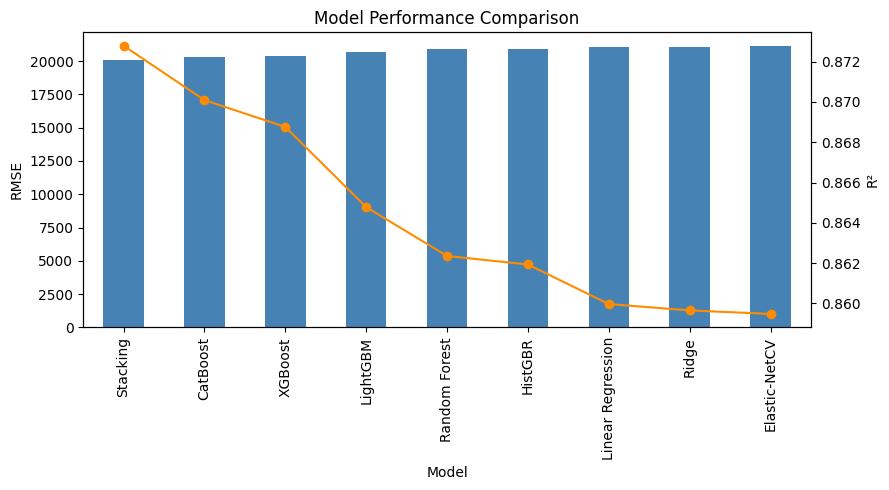

In [19]:
#  Run, benchmark, and save all models
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from joblib import dump
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

!pip install catboost
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Impute missing values with the mean for all models in the pipeline
imputer = SimpleImputer(strategy='mean')

# Candidate models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
    "XGBoost":       XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=4,
                                  subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1),
    "LightGBM":      LGBMRegressor(n_estimators=400, learning_rate=0.05, max_depth=4,
                                   subsample=0.8, colsample_bytree=0.8, random_state=42, verbose=-1),
    "Elastic-NetCV": ElasticNetCV(alphas=np.logspace(-3, 2, 50), l1_ratio=[.1,.5,.9], cv=5, max_iter=10000),
    "HistGBR":       HistGradientBoostingRegressor(max_depth=None, learning_rate=0.05,
                                                   max_iter=400, random_state=42),
    "CatBoost":      CatBoostRegressor(iterations=400, learning_rate=0.05, depth=6,loss_function='RMSE', verbose=False, random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge":             Ridge(alpha=10)
}

# Wrap models in pipelines with imputer to avoid null type errors
pipelined_models = {}
for name, model in models.items():
    pipelined_models[name] = Pipeline([('imputer', imputer), (name.lower().replace(' ', '_'), model)])

models = pipelined_models

base_learners = [
    ('rf', models["Random Forest"]),
    ('xgb', models["XGBoost"]),
    ('elastic', models["Elastic-NetCV"])
]
stacker = StackingRegressor(
    estimators=[(name, Pipeline([('imputer', imputer), (name.lower().replace(' ', '_'), model.steps[-1][1])])) for name, model in base_learners],
    final_estimator=Pipeline([('imputer', imputer), ('elastic_net_cv', ElasticNetCV(cv=5, max_iter=10000))]),
    passthrough=True,
    n_jobs=-1
)
models["Stacking"] = stacker

# evaluate the models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)
    results.append([name, rmse, r2])
    dump(model, f"{name}.pkl")

results_df = (pd.DataFrame(results, columns=["Model","RMSE","R²"])
                .sort_values("RMSE")
                .reset_index(drop=True))
display(results_df)

# Visualizations
fig, ax1 = plt.subplots(figsize=(9,5))
results_df.plot(kind='bar', x='Model', y='RMSE', ax=ax1, color='steelblue', legend=False)
ax1.set_ylabel("RMSE")
ax2 = ax1.twinx()
results_df.plot(kind='line', x='Model', y='R²', ax=ax2, color='darkorange', marker='o', legend=False)
ax2.set_ylabel("R²")
ax1.set_title("Model Performance Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()